In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
import pickle

"""


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold


from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import pickle
"""

'\n\n\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import RepeatedStratifiedKFold\n\n\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.model_selection import GridSearchCV\nimport pickle\n'

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
df=pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


CONCLUSION :- We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers

In [8]:
descr = df.describe()

In [9]:
print('BloodPressure', df[df['BloodPressure']==0].shape[0])
print('Glucose', df[df['Glucose']==0].shape[0])
print('SkinThickness', df[df['SkinThickness']==0].shape[0])
print('Insulin', df[df['Insulin']==0].shape[0])
print('BMI', df[df['BMI']==0].shape[0])

BloodPressure 35
Glucose 5
SkinThickness 227
Insulin 374
BMI 11


Existen valores igual a 0, que médicamente no son posibles. 
Se deben sustituir por los valores mas adecuados en cada caso.

<AxesSubplot: xlabel='DiabetesPedigreeFunction'>

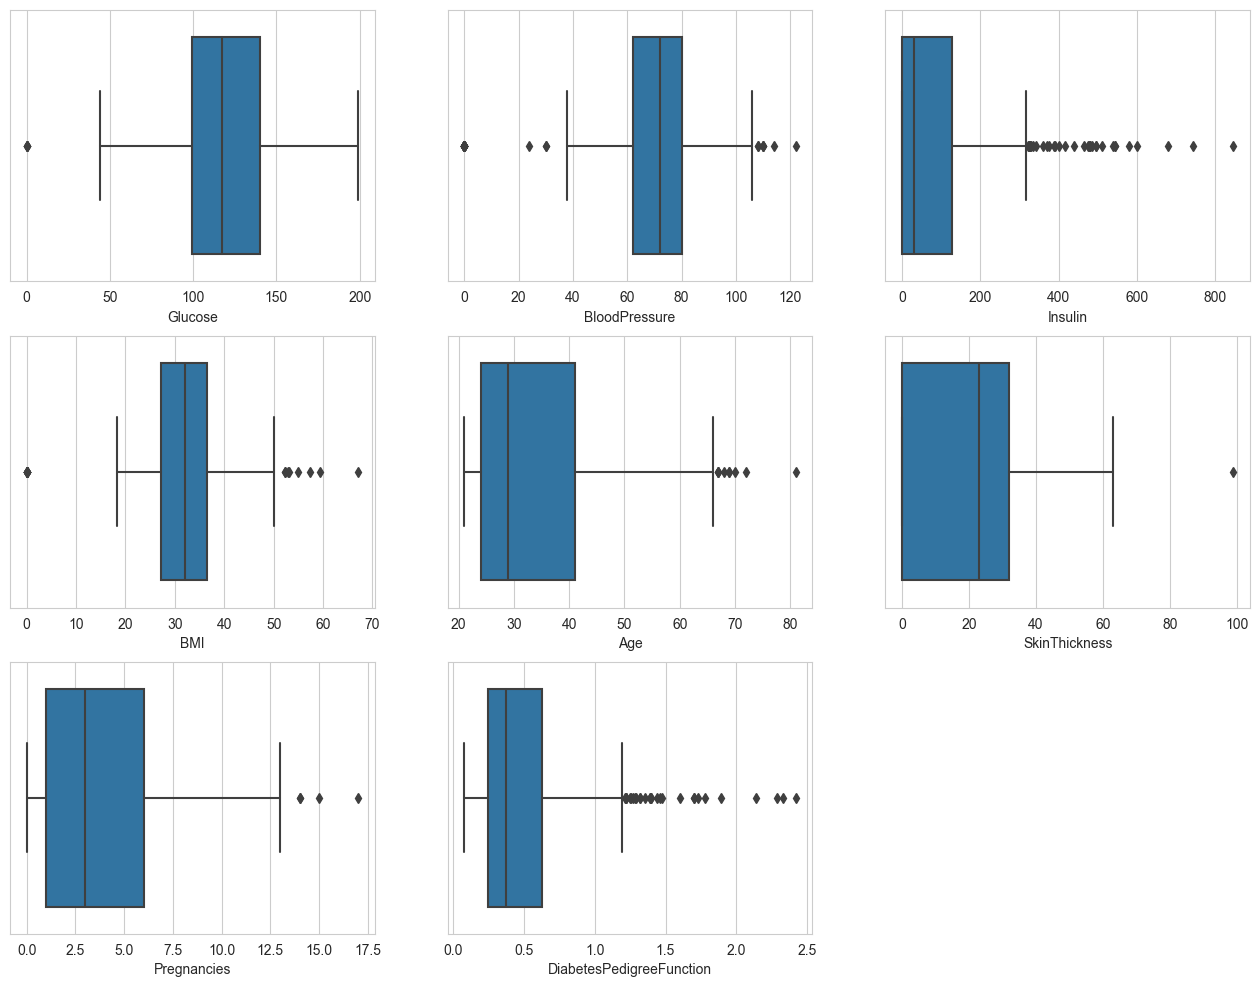

In [10]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

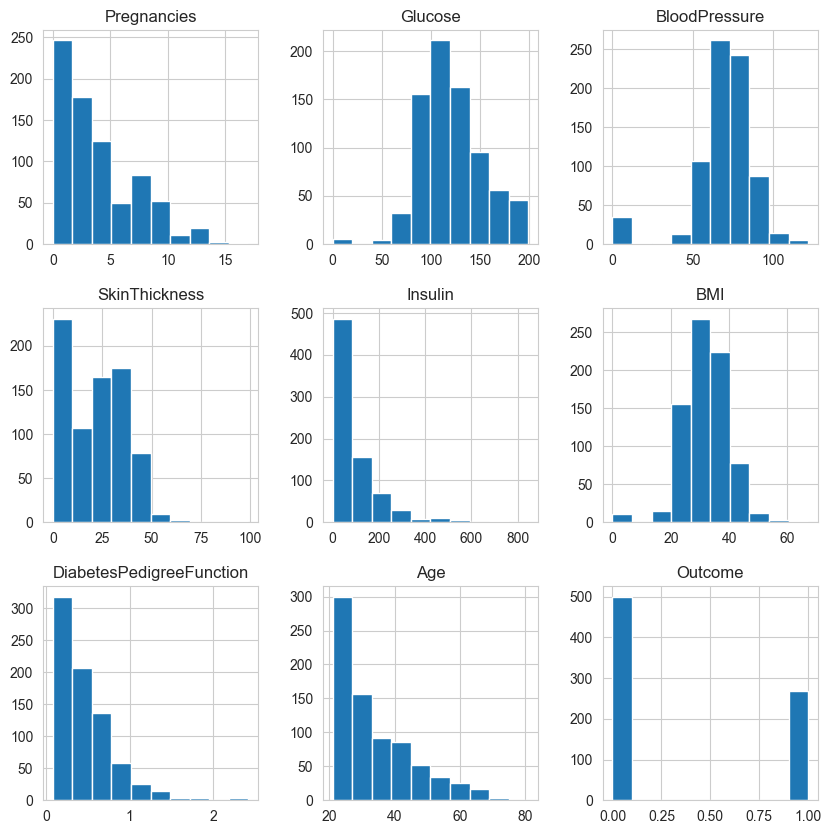

In [11]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

In [12]:
df['Glucose']=df['Glucose'].replace(0,None)#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,None)#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,None)#skewed distribution
df['Insulin']=df['Insulin'].replace(0,None)#skewed distribution
df['BMI']=df['BMI'].replace(0,None)#skewed distribution

In [13]:
#replacing 0 values with median of that column

Media_glucosa = df['Glucose'].mean()
df["Glucose"].fillna(df['Glucose'].mean(), inplace = True)
 
#df['Glucose']=df['Glucose'].replace(None,df['Glucose'].mean())#normal distribution
media_blood = df['BloodPressure'].mean()
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
#df['BloodPressure']=df['BloodPressure'].replace(None,df['BloodPressure'].mean())#normal distribution
media_skin = df['SkinThickness'].median()
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
#df['SkinThickness']=df['SkinThickness'].replace(None,df['SkinThickness'].median())#skewed distribution
media_insulina =df['Insulin'].median()
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
#df['Insulin']=df['Insulin'].replace(None,df['Insulin'].median())#skewed distribution
media_bmi = df['BMI'].median()
df['BMI'].fillna(df['BMI'].median(), inplace = True)
#df['BMI']=df['BMI'].replace(None,df['BMI'].median())#skewed distribution

<AxesSubplot: xlabel='DiabetesPedigreeFunction'>

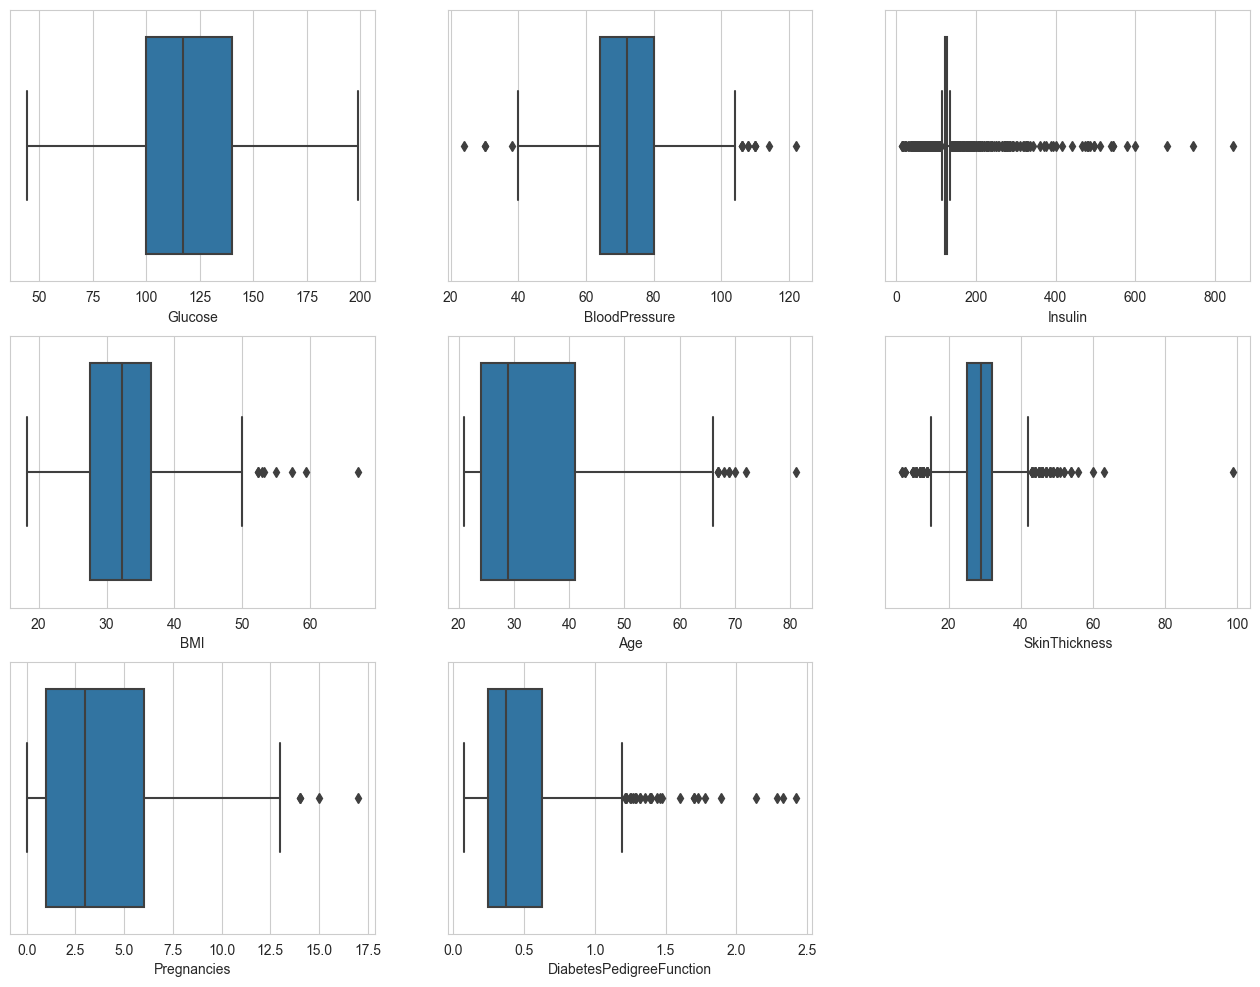

In [14]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

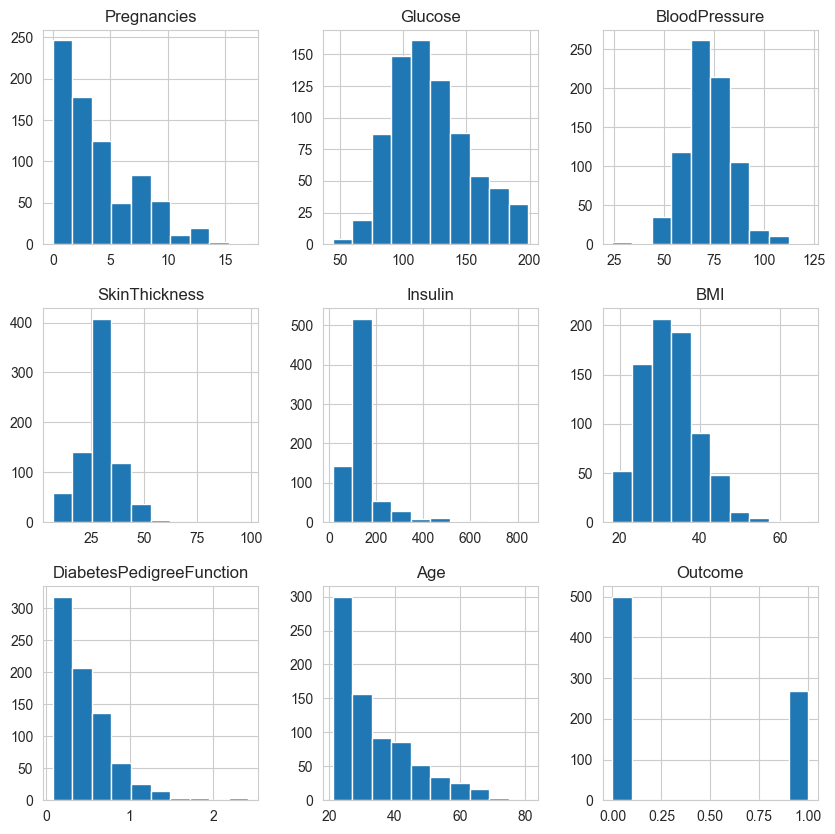

In [15]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

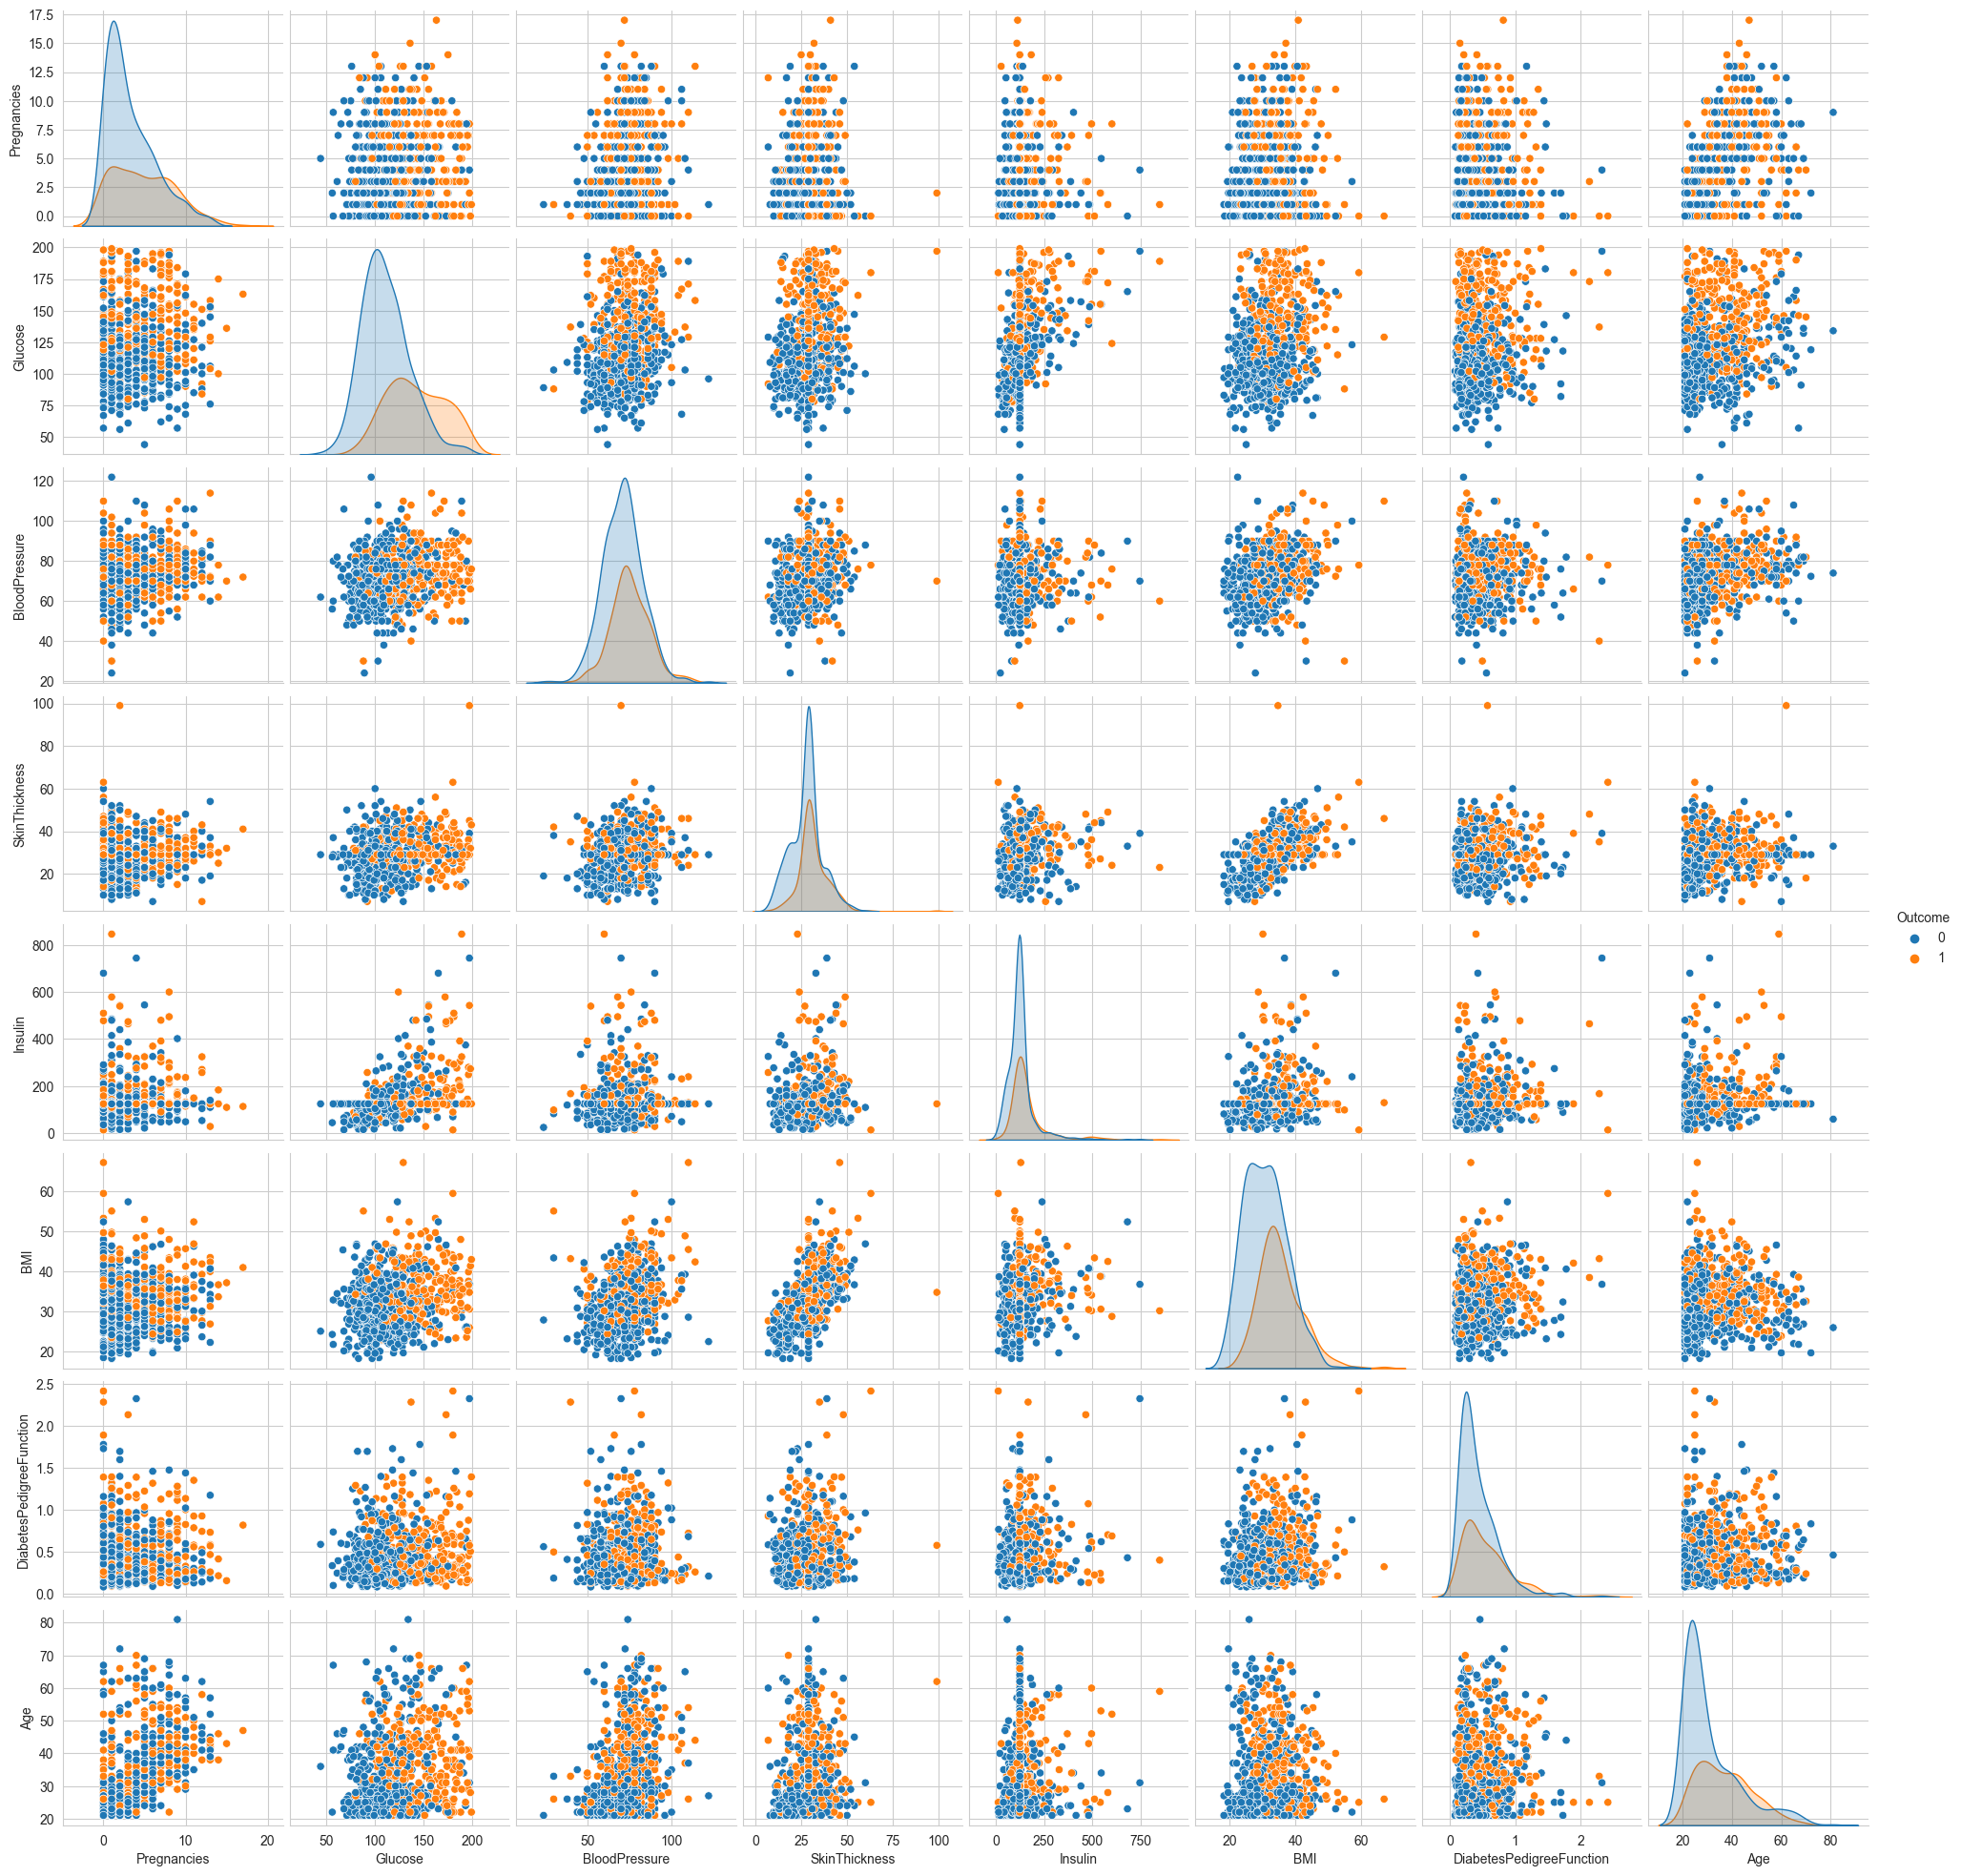

In [16]:
sns.pairplot(df,hue="Outcome") 

<AxesSubplot: >

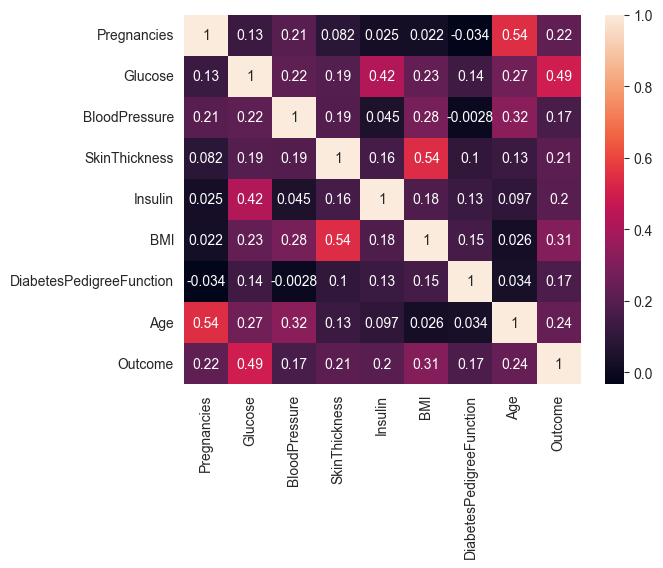

In [17]:
sns.heatmap(df.corr(), annot=True) 

In [18]:
#df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')
df_selected=df

In [19]:
df_describe = df_selected.describe()
#df_leido=pd.read_csv("calculos.csv",index_col = 0)

In [20]:
df_describe['SkinThickness']['mean'] = media_skin
df_describe['BMI']['mean'] = media_bmi
df_describe['Insulin']['mean'] = media_insulina


In [21]:
#df_describe.head(10)

df_describe.to_csv('calculos.csv')  

In [22]:
minmax = MinMaxScaler()

df_selected['Pregnancies'] = minmax.fit_transform(df_selected[['Pregnancies']])
df_selected['Glucose'] = minmax.fit_transform(df[['Glucose']])
df_selected['SkinThickness'] = minmax.fit_transform(df[['SkinThickness']])
df_selected['BMI'] = minmax.fit_transform(df[['BMI']])
df_selected['Age'] = minmax.fit_transform(df[['Age']])
df_selected['BloodPressure'] = minmax.fit_transform(df[['BloodPressure']])
df_selected['Insulin'] = minmax.fit_transform(df[['Insulin']])
df_selected['DiabetesPedigreeFunction'] = minmax.fit_transform(df[['DiabetesPedigreeFunction']])


df_selected.head()
"""
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()
"""

"\nx=df_selected\nquantile  = QuantileTransformer()\nX = quantile.fit_transform(x)\ndf_new=quantile.transform(X)\ndf_new=pd.DataFrame(X)\ndf_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']\ndf_new.head()\n"

In [23]:
df_selected.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


In [24]:
target_name='Outcome'
y= df_selected[target_name]#given predictions - training data 
X=df_selected.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [25]:

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test


In [26]:
#Logistic Regression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test)
y_pred 

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm 

array([[98,  9],
       [20, 27]], dtype=int64)

In [28]:
# Calculo de precisión del modelo 
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precisión del modelo:")
print(precision) 
# calculo para la exactitud del modelo
exactitud_lr = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud_lr) 
# Calcular la sensibilidad del modelo
sensibilidad = metrics.recall_score(y_test, y_pred, average='weighted')
print("Sensibilidad del modelo")
print(sensibilidad) 
 #Calculo el puntaje F1 del modelo
puntajef1 = metrics.f1_score(y_test, y_pred, average='weighted')
print("Puntaje F1 del modelo")
print(puntajef1) 

Precisión del modelo:
0.8059377063614352
Exactitud del modelo:
0.8116883116883117
Sensibilidad del modelo
0.8116883116883117
Puntaje F1 del modelo
0.8038130009214346


In [29]:
#Vecinos
kne = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2) 
kne.fit(X_train, y_train) 
y_pred = kne.predict(X_test)
y_pred 

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [30]:
cm = confusion_matrix(y_test, y_pred)
cm 

array([[89, 18],
       [16, 31]], dtype=int64)

In [31]:
# Calculo de precisión del modelo 
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precisión del modelo:")
print(precision) 
# calculo para la exactitud del modelo
exactitud_kne = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud_kne) 
# Calcular la sensibilidad del modelo
sensibilidad = metrics.recall_score(y_test, y_pred, average='weighted')
print("Sensibilidad del modelo")
print(sensibilidad)
 #Calculo el puntaje F1 del modelo
puntajef1 = metrics.f1_score(y_test, y_pred, average='weighted')
print("Puntaje F1 del modelo")
print(puntajef1) 

Precisión del modelo:
0.7820125452778515
Exactitud del modelo:
0.7792207792207793
Sensibilidad del modelo
0.7792207792207793
Puntaje F1 del modelo
0.7804791513517928


In [32]:
#Modelo SVM
sv = svm.SVC(kernel='linear') # Linear Kernel 
sv.fit(X_train, y_train) 
y_pred = sv.predict(X_test)
y_pred 

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [33]:
cm = confusion_matrix(y_test, y_pred)
cm 

array([[97, 10],
       [21, 26]], dtype=int64)

In [34]:
# Calculo de precisión del modelo 
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precisión del modelo:")
print(precision) 
# calculo para la exactitud del modelo
exactitud_sv = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud_sv) 
# Calcular la sensibilidad del modelo
sensibilidad = metrics.recall_score(y_test, y_pred, average='weighted')
print("Sensibilidad del modelo")
print(sensibilidad)
 #Calculo el puntaje F1 del modelo
puntajef1 = metrics.f1_score(y_test, y_pred, average='weighted')
print("Puntaje F1 del modelo")
print(puntajef1) 

Precisión del modelo:
0.7915718932668085
Exactitud del modelo:
0.7987012987012987
Sensibilidad del modelo
0.7987012987012987
Puntaje F1 del modelo
0.7902828630539473


In [35]:
# Naives Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred 

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [36]:
cm = confusion_matrix(y_test, y_pred)
cm 

array([[92, 15],
       [18, 29]], dtype=int64)

In [37]:
# Calculo de precisión del modelo 
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precisión del modelo:")
print(precision) 
# calculo para la exactitud del modelo
exactitud_gnb = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud_gnb) 
# Calcular la sensibilidad del modelo
sensibilidad = metrics.recall_score(y_test, y_pred, average='weighted')
print("Sensibilidad del modelo")
print(sensibilidad)
 #Calculo el puntaje F1 del modelo
puntajef1 = metrics.f1_score(y_test, y_pred, average='weighted')
print("Puntaje F1 del modelo")
print(puntajef1) 

Precisión del modelo:
0.7822609208972845
Exactitud del modelo:
0.7857142857142857
Sensibilidad del modelo
0.7857142857142857
Puntaje F1 del modelo
0.7836633412670279


In [38]:
# Modelo Decision Tree

dt = DecisionTreeClassifier()

dt = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_pred 

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm 

array([[85, 22],
       [19, 28]], dtype=int64)

In [40]:
# Calculo de precisión del modelo 
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precisión del modelo:")
print(precision) 
# calculo para la exactitud del modelo
exactitud_dt = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud_dt) 
# Calcular la sensibilidad del modelo
sensibilidad = metrics.recall_score(y_test, y_pred, average='weighted')
print("Sensibilidad del modelo")
print(sensibilidad)
 #Calculo el puntaje F1 del modelo
puntajef1 = metrics.f1_score(y_test, y_pred, average='weighted')
print("Puntaje F1 del modelo")
print(puntajef1) 

Precisión del modelo:
0.7387787212787214
Exactitud del modelo:
0.7337662337662337
Sensibilidad del modelo
0.7337662337662337
Puntaje F1 del modelo
0.7359905936639215


In [41]:
# modelo Random Forest
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred 

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm 

array([[95, 12],
       [15, 32]], dtype=int64)

In [43]:
# Calculo de precisión del modelo 
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precisión del modelo:")
print(precision) 
# calculo para la exactitud del modelo
exactitud_rf = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud_rf) 
# Calcular la sensibilidad del modelo
sensibilidad = metrics.recall_score(y_test, y_pred, average='weighted')
print("Sensibilidad del modelo")
print(sensibilidad)
 #Calculo el puntaje F1 del modelo
puntajef1 = metrics.f1_score(y_test, y_pred, average='weighted')
print("Puntaje F1 del modelo")
print(puntajef1) 

Precisión del modelo:
0.8220188902007084
Exactitud del modelo:
0.8246753246753247
Sensibilidad del modelo
0.8246753246753247
Puntaje F1 del modelo
0.8229972792184774


In [44]:
with open('modelo_RF.pkl', 'wb') as mod:
    pickle.dump(rf,mod)

In [45]:
#gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
gb_clf = GradientBoostingClassifier(n_estimators=150, max_features=20, max_depth=20, random_state=0)
gb_clf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred 

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm 

array([[95, 12],
       [15, 32]], dtype=int64)

In [47]:
# Calculo de precisión del modelo 
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precisión del modelo:")
print(precision) 
# calculo para la exactitud del modelo
exactitud_rf = metrics.accuracy_score(y_test, y_pred)
print("Exactitud del modelo:")
print(exactitud_rf) 
# Calcular la sensibilidad del modelo
sensibilidad = metrics.recall_score(y_test, y_pred, average='weighted')
print("Sensibilidad del modelo")
print(sensibilidad)
 #Calculo el puntaje F1 del modelo
puntajef1 = metrics.f1_score(y_test, y_pred, average='weighted')
print("Puntaje F1 del modelo")
print(puntajef1) 

Precisión del modelo:
0.8220188902007084
Exactitud del modelo:
0.8246753246753247
Sensibilidad del modelo
0.8246753246753247
Puntaje F1 del modelo
0.8229972792184774


In [48]:
with open('modelo_GBC.pkl', 'wb') as mod:
    pickle.dump(gb_clf,mod)